# **DIC Shear Crack Inspector**

In [1]:
%matplotlib widget

In [2]:
from bmcs_shear.dic_crack import DICGrid, DICAlignedGrid, DICCOR, DICInspector, DICCrack

# B1_TV1

In [3]:
dic_grid = DICGrid(n_x=59, n_y=15, d_x = 22, d_y = 22,  
                     start_t = 0, end_t =24, U_factor = 1, dir_name='B1_TV1')
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-17, y_ref_j_min=1, y_ref_j_max=10)
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = 29, n_x_max = 38, n_x_step=1, n_y_min = 4, n_y_step = 1)

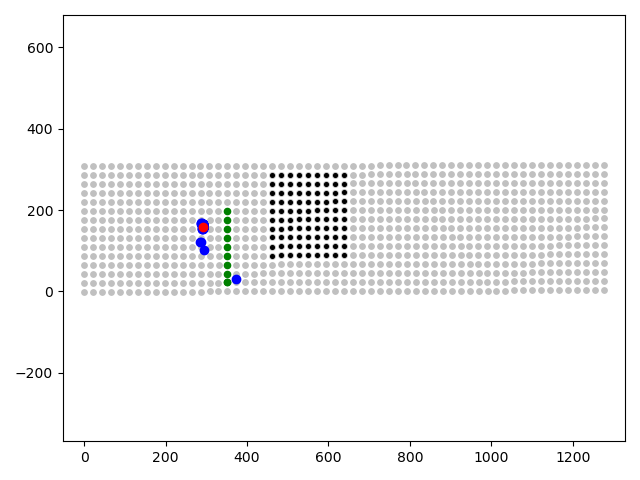

In [4]:
dic_cor.interact()

In [5]:
# import numpy as np
# np.shape(dic_cor.phi)

AttributeError: 'DICCOR' object has no attribute 'phi'

In [58]:
_, rot_vect_u_anp, _ = dic_cor.dic_aligned_grid.displ_grids
rot_vect_u_anp_sel = rot_vect_u_anp[:,:,dic_cor.dic_aligned_grid.y_ref_j_min:dic_cor.dic_aligned_grid.y_ref_j_max]
rot_Xu_ija_sel = (dic_cor.dic_aligned_grid.rot_Xu_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                                   dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
rot_X_pa_sel = rot_Xu_ija_sel.reshape(-1, 2) 
dist_x_cor_u_end = np.sqrt((dic_cor.x_cor_pa_sol[:,0] - rot_X_pa_sel[:,0])**2
                     +(dic_cor.x_cor_pa_sol[:,1] - rot_X_pa_sel[:,1])**2)
np.shape(rot_vect_u_anp[:,:,dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
rot_vect_u_anp[:,:,:]
X_ija_sel = dic_cor.dic_grid.X_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                                   dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step]
X_pa_sel = X_ija_sel.reshape(-1, 2)
dist_x_cor_u_start = np.sqrt((dic_cor.x_cor_pa_sol[:,0] - X_pa_sel[:,0])**2
                      +(dic_cor.x_cor_pa_sol[:,1] - X_pa_sel[:,1])**2)
dist_u_end_u_start = np.sqrt((rot_X_pa_sel[:,0] - X_pa_sel[:,0])**2
                      +(rot_X_pa_sel[:,1] - X_pa_sel[:,1])**2)
# phi = np.arccos((dist_x_cor_u_end**2 + dist_x_cor_u_start**2 - dist_u_end_u_start**2)
#                 / (2 * dist_x_cor_u_end * dist_x_cor_u_start))
dist_x_cor_u_end_average = np.average(dist_x_cor_u_end)
dist_x_cor_u_start_average = np.average(dist_x_cor_u_start)
dist_u_end_u_start_average = np.average(dist_u_end_u_start)
dist_x_cor_u_end_average, dist_x_cor_u_start_average, dist_u_end_u_start_average
phi = np.arccos((dist_x_cor_u_end_average**2 + dist_x_cor_u_start_average**2 - dist_u_end_u_start_average**2)
                / (2 * dist_x_cor_u_end_average * dist_x_cor_u_start_average))
phi * 180/np.pi

0.16776099432892588

In [ ]:
rot_Xu_ija_sel = (dic_cor.dic_aligned_grid.rot_Xu_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                                   dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
rot_X_pa_sel = rot_Xu_ija_sel.reshape(-1, 2) 
np.shape(rot_X_pa_sel)

In [ ]:
#np.shape(dic_cor.dic_aligned_grid.rot_Xu_ija)
rot_Xu_ija = dic_cor.dic_aligned_grid.rot_Xu_ija
#rot_vect_u_anp[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
#                dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step, :]

#np.shape(rot_vect_u_anp[:,:, dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step])
rot_Xu_ija_ = rot_Xu_ija[dic_cor.n_x_min:dic_cor.n_x_max:dic_cor.n_x_step,
                dic_cor.n_y_min:dic_cor.n_y_max:dic_cor.n_y_step, :]
Xu_aij = np.einsum('ija->aij', rot_Xu_ija_)
np.shape(Xu_aij)

In [42]:
X_cor = np.array([0,0])
u_0 = np.array([5,-2])
u_e = np.array([7,2])
dis_x_cor_u_0 = np.sqrt((X_cor[0] - u_0[0])**2
                      +(X_cor[1] - u_0[1])**2)
dis_x_cor_u_e = np.sqrt((X_cor[0] - u_e[0])**2
                      +(X_cor[1] - u_e[1])**2)
dis_u_0_u_e = np.sqrt((u_0[0] - u_e[0])**2
                      +(u_0[1] - u_e[1])**2)
alpha = np.arccos((dis_x_cor_u_e**2 + dis_x_cor_u_0**2 - dis_u_0_u_e**2) / (2 * dis_x_cor_u_e * dis_x_cor_u_0))
u_e_var = np.array([[5.5,-1],[6,1],[6.5,1.5],[7,2]])
u_e_var_len = len(u_e_var)
for i in range(u_e_var_len):
    dis_x_cor_u_0 = np.sqrt((X_cor[0] - u_0[0])**2
                      +(X_cor[1] - u_0[1])**2)
#     print(u_e_var[i][0])
    dis_x_cor_u_e = np.sqrt((X_cor[0] - u_e_var[i][0])**2
                            +(X_cor[1] - u_e_var[i][1])**2)
    dis_u_0_u_e = np.sqrt((u_0[0] - u_e_var[i][0])**2
                      +(u_0[1] - u_e_var[i][1])**2)
    alpha = np.arccos((dis_x_cor_u_e**2 + dis_x_cor_u_0**2 - dis_u_0_u_e**2) / 
                      (2 * dis_x_cor_u_e * dis_x_cor_u_0))
    print(alpha * 180/np.pi)

11.49656301758577
31.26373169437745
34.79602627826831
37.746805387274655


# B6_TV1

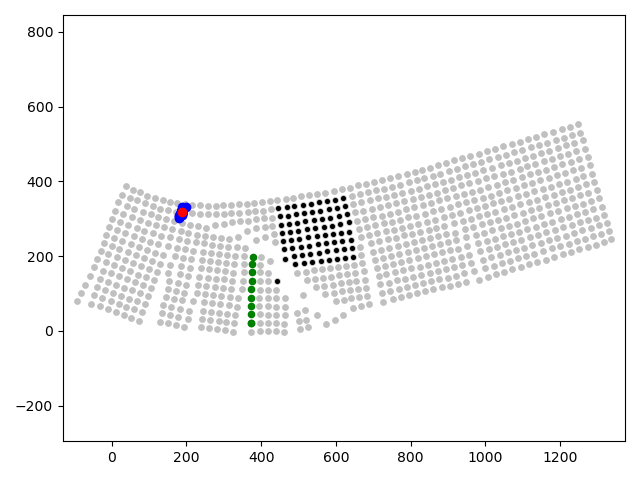

In [4]:
dic_grid = DICGrid(n_x=58, n_y=15, d_x = 22, d_y = 22, 
                     start_t = 0, end_t =8, U_factor = 100, dir_name='B6_TV1')
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-18, y_ref_j_min=1, y_ref_j_max=10 )
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = 29, n_x_max = 38, n_x_step=1, n_y_min = 6, n_y_step = 1)
dic_cor.interact()

# B7_TV1

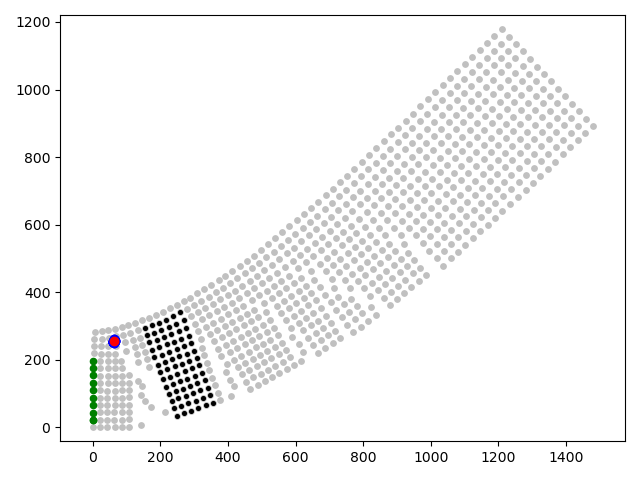

In [46]:
dic_grid = DICGrid(n_x=58, n_y=14, d_x = 22, d_y = 22, start_t = 0, end_t =6, U_factor = 100, dir_name='B7_TV1')
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i=-1, y_ref_j_min=1, y_ref_j_max=10 )
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = 45, n_x_max = 51, n_x_step=1, n_y_min = 0, n_y_step = 1)
dic_cor.interact()

# B1_TV2

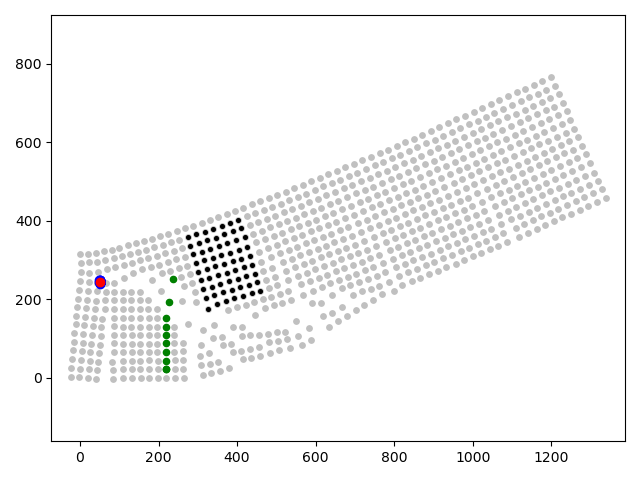

In [55]:
dic_grid = DICGrid(n_x=57, n_y=15, d_x = 22, d_y = 22, tart_t = 0, end_t =7, 
                     U_factor = 60, dir_name='B1_TV2')
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i = 46, y_ref_j_min=1, y_ref_j_max=10 )
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = -20, n_x_max = -13, n_y_step=1, n_y_min = 5, n_x_step = 1)
dic_cor.interact()

# B6_TV2

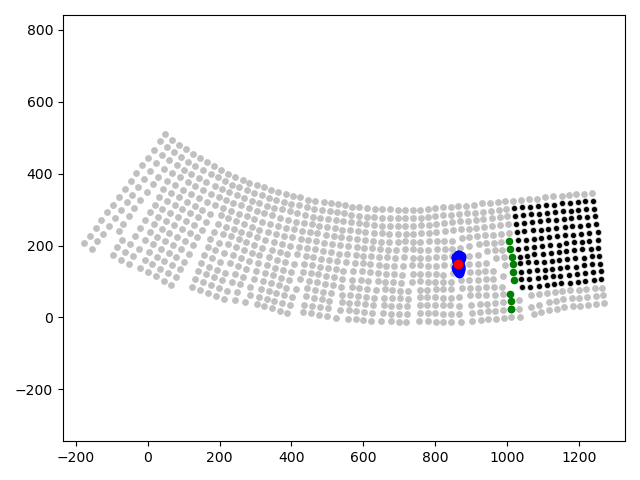

In [71]:
dic_grid = DICGrid(n_x=58, n_y=15, d_x = 22, d_y = 22, start_t = 0, end_t =8, U_factor = 100, dir_name='B6_TV2')
dic_aligned_grid = DICAlignedGrid(dic_grid=dic_grid,
                                 y_ref_i = 11, y_ref_j_min=1, y_ref_j_max=10 )
dic_cor = DICCOR(dic_aligned_grid=dic_aligned_grid,
                 n_x_min = 0, n_x_max = 11, n_x_step=1, n_y_min = 3, n_y_step = 1)
dic_cor.interact()